<a href="https://colab.research.google.com/github/ricardodhuelsmann/data_science/blob/main/prediction_of_quality_of_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description

Dataset = https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

### Studies based on previous work from Vishal Kumar
URL = https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine



In [34]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
#last line is a magic function in IPython, setting the backend of matplotlib to the 'inline' backend:

In [35]:
#Load dataset
wine_data = pd.read_csv('winequality-red.csv')

In [36]:
#Check data
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
#Obtain information about the data columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
#Verify min and max values for each collumn
wine_data.describe()
#With this information, for example, it is possible to learn that wine quality values range from 3 to 8.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## First of all, it is interesting to see how data are distributed in the dataset

In [39]:
#Define some figure properties
sns.set_theme(style="whitegrid", palette="cividis", font_scale=1.3)

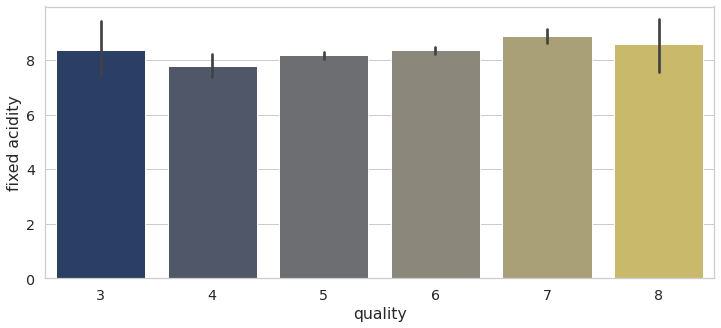

In [40]:
#Evaluate the relation between fixed acidity and quality
figure_1 = plt.figure(figsize = (12,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

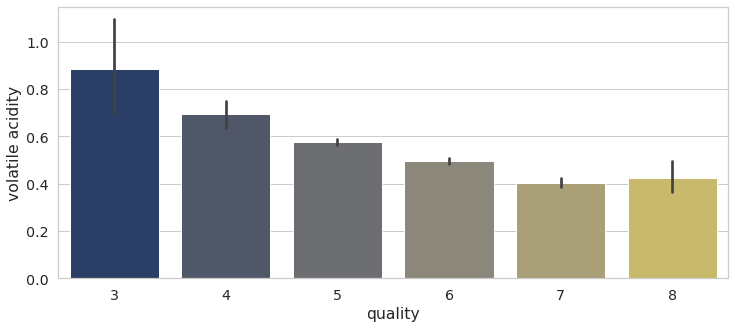

In [41]:
#As cen be seen, fixed acidity does not have a proper relation with wine quality. Now, check another parameter, the volatile acidity
figure_2 = plt.figure(figsize = (12,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

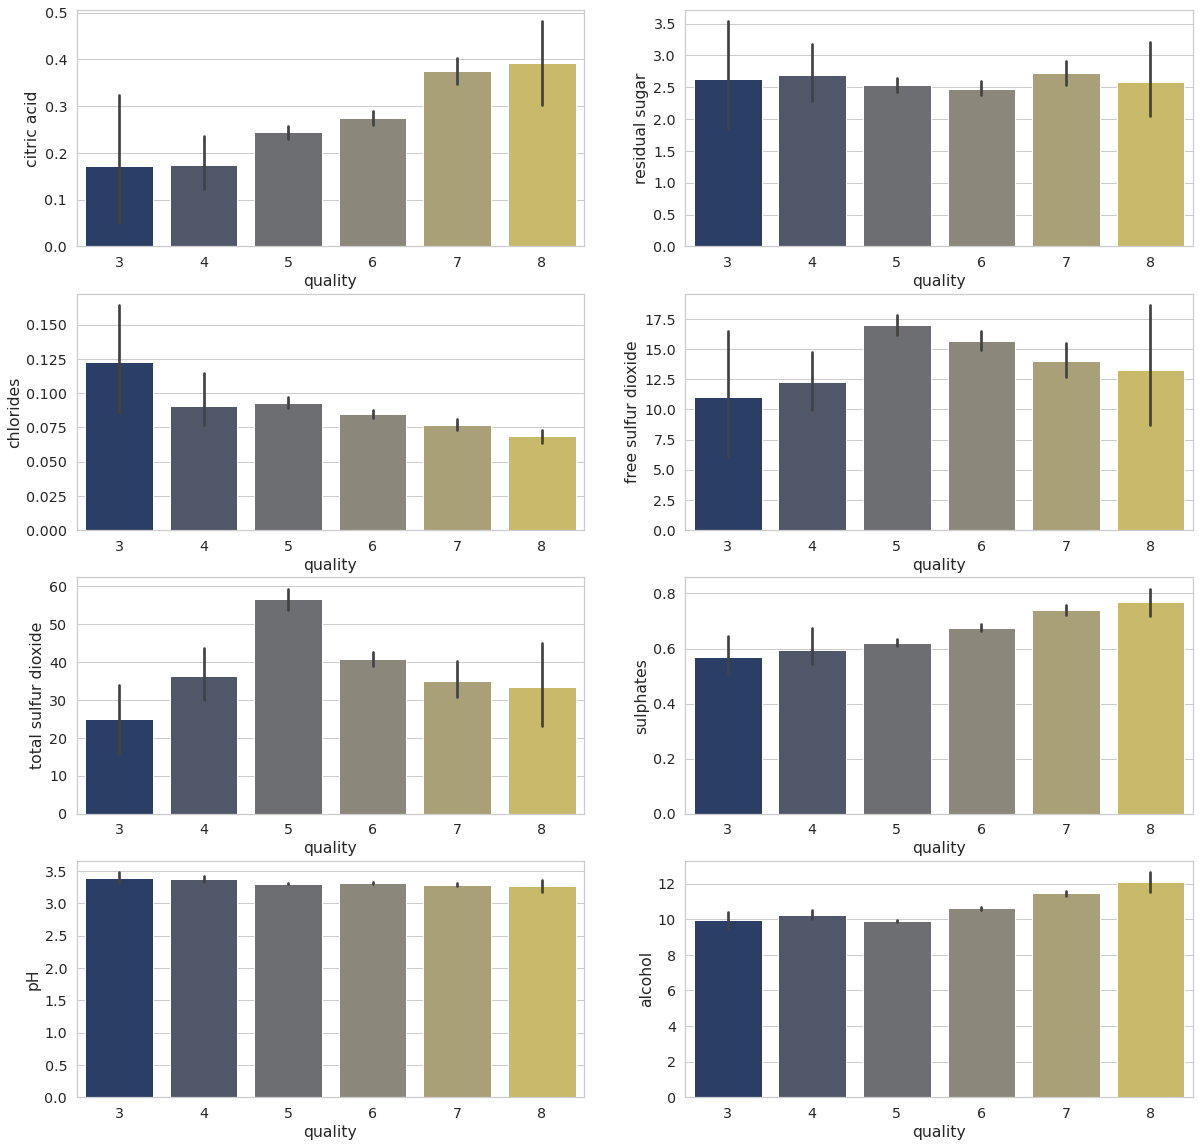

In [42]:
#Volatile acidity seens to affect directly the wine quality. Let's study other parameters
figure, axis = plt.subplots(4, 2, figsize=(20, 20))

sns.barplot(ax=axis[0,0], x = 'quality', y = 'citric acid', data = wine_data)
sns.barplot(ax=axis[0,1], x = 'quality', y = 'residual sugar', data = wine_data)
sns.barplot(ax=axis[1,0], x = 'quality', y = 'chlorides', data = wine_data)
sns.barplot(ax=axis[1,1], x = 'quality', y = 'free sulfur dioxide', data = wine_data)
sns.barplot(ax=axis[2,0], x = 'quality', y = 'total sulfur dioxide', data = wine_data)
sns.barplot(ax=axis[2,1], x = 'quality', y = 'sulphates', data = wine_data)
sns.barplot(ax=axis[3,0], x = 'quality', y = 'pH', data = wine_data)
sns.barplot(ax=axis[3,1], x = 'quality', y = 'alcohol', data = wine_data)

# Combine all the plots and display
plt.show()

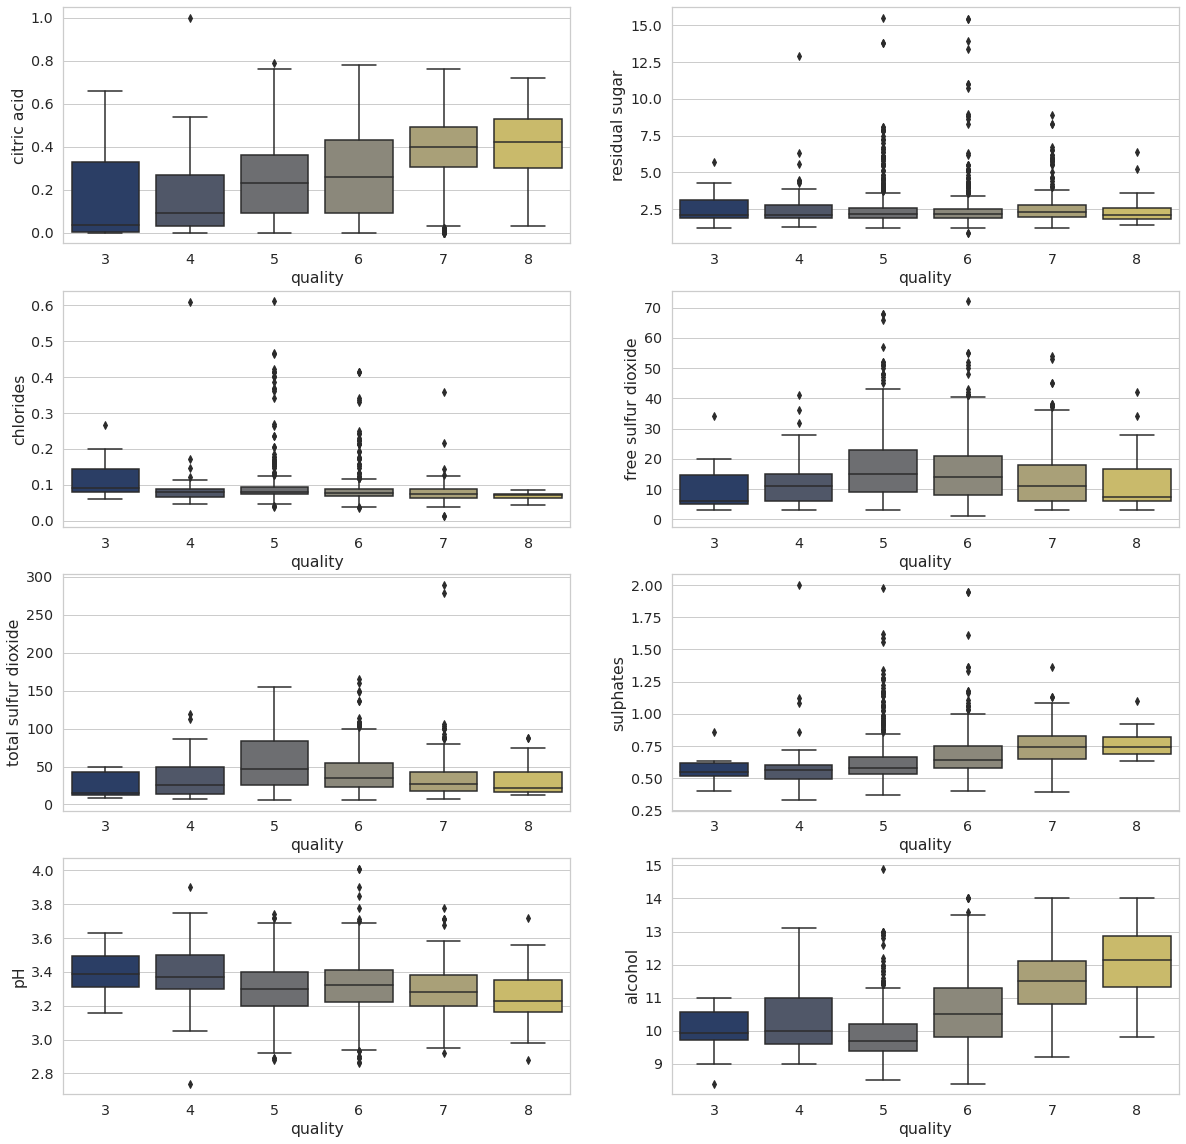

In [43]:
figure, axis = plt.subplots(4, 2, figsize=(20, 20))

sns.boxplot(ax=axis[0,0], x = 'quality', y = 'citric acid', data = wine_data)
sns.boxplot(ax=axis[0,1], x = 'quality', y = 'residual sugar', data = wine_data)
sns.boxplot(ax=axis[1,0], x = 'quality', y = 'chlorides', data = wine_data)
sns.boxplot(ax=axis[1,1], x = 'quality', y = 'free sulfur dioxide', data = wine_data)
sns.boxplot(ax=axis[2,0], x = 'quality', y = 'total sulfur dioxide', data = wine_data)
sns.boxplot(ax=axis[2,1], x = 'quality', y = 'sulphates', data = wine_data)
sns.boxplot(ax=axis[3,0], x = 'quality', y = 'pH', data = wine_data)
sns.boxplot(ax=axis[3,1], x = 'quality', y = 'alcohol', data = wine_data)

# Combine all the plots and display
plt.show()

To perform Machine Learning, it is necessary to process the data

In [44]:
#Making a quality-based rating, dividing wine as good or bad.

bins = (2, 6, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [45]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [46]:
#Now, using the LabelEncoder, the transformation of the wine's qualities is carried out
label_quality = LabelEncoder()
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

In [47]:
#Good wines are 1 and bad are 0
#Below is the count of how many examples there are in each class
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


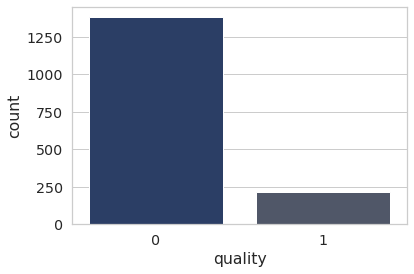

In [48]:
sns.countplot(wine_data['quality'])

In [49]:
#The data is divided between input (x) and output (y) elements
x = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [15]:
#Standardizing the data is important, so that each value has a similar influence
std_scalar = StandardScaler()
x = std_scalar.fit_transform(x)

In [16]:
#Now the values are divided between training and testing, applying 20% of the data for tests.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

After this processing, the training and test data are ready to be used in the modeling by the machine learning algorithms.



### Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [29]:
#Now view the level of results
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [30]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 22  25]]


In [31]:
rfc.score(x_test, y_test)

0.90625



## Stochastic Gradient Decent Classifier

In [83]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [84]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       273
           1       0.42      0.21      0.28        47

    accuracy                           0.84       320
   macro avg       0.65      0.58      0.60       320
weighted avg       0.81      0.84      0.82       320



In [85]:
print(confusion_matrix(y_test, pred_sgd))

[[259  14]
 [ 37  10]]


In [86]:
sgd.score(x_test, y_test)

0.840625

## Support Vector Classifier

In [87]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [88]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [89]:
print(confusion_matrix(y_test, pred_svc))

[[268   5]
 [ 35  12]]


In [90]:
svc.score(x_test, y_test)

0.875

## Let's try to increase our accuracy of models
## Grid Search CV

In [91]:
#Finding best parameters for the SVC model
param = {
    'n_estimators': [(100), (10), (500)],
    'criterion':['gini', 'entropy'],
    'gamma' :[0.9,1,1.1,1.2]
}

grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [92]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.9, 1, 1.1, 1.2], 'gamma': [0.9, 1, 1.1, 1.2],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [ ]:
df = pd.DataFrame(grid_svc.cv_results_)
df

In [94]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 1, 'kernel': 'rbf'}

In [95]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  1.0, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.36      0.52        47

    accuracy                           0.90       320
   macro avg       0.90      0.68      0.73       320
weighted avg       0.90      0.90      0.88       320



In [96]:
print(confusion_matrix(y_test, pred_svc2))

[[271   2]
 [ 30  17]]


In [97]:
svc2.score(x_test, y_test)

0.9

In [17]:
#The result of the SVC was not better than the RFC, so it is possible to try to improve the RFC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier(random_state = 35)

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

In [19]:
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x_train,y_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}  



In [20]:
rf = RandomForestClassifier(n_estimators=11, bootstrap=False, 
                               max_depth=90, max_features='auto', min_samples_leaf=3, 
                               min_samples_split=6, random_state=1)

In [24]:
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

In [25]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.67      0.55      0.60        47

    accuracy                           0.89       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.89      0.89      0.89       320



In [26]:
print(confusion_matrix(y_test, pred_rf))

[[260  13]
 [ 21  26]]


In [27]:
rf.score(x_test, y_test)

0.89375

In short, the best performance was Randon Forest, even without optimization. But in general, all the results are statistically similar, with excellent accuracy, showing that with simple models it is possible to create a predictive machine with approximately 90% accuracy to analyze the quality of wines from physical-chemical information.